**Load The Data**

In [1]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
filename = '/content/water_potability.csv'
dataset = read_csv(filename)

NameError: name 'df' is not defined

In [3]:
print(dataset.shape)

(3276, 10)


In [4]:
print(dataset.head(20))

           ph    Hardness        Solids  Chloramines     Sulfate  \
0         NaN  204.890455  20791.318981     7.300212  368.516441   
1    3.716080  129.422921  18630.057858     6.635246         NaN   
2    8.099124  224.236259  19909.541732     9.275884         NaN   
3    8.316766  214.373394  22018.417441     8.059332  356.886136   
4    9.092223  181.101509  17978.986339     6.546600  310.135738   
5    5.584087  188.313324  28748.687739     7.544869  326.678363   
6   10.223862  248.071735  28749.716544     7.513408  393.663396   
7    8.635849  203.361523  13672.091764     4.563009  303.309771   
8         NaN  118.988579  14285.583854     7.804174  268.646941   
9   11.180284  227.231469  25484.508491     9.077200  404.041635   
10   7.360640  165.520797  32452.614409     7.550701  326.624353   
11   7.974522  218.693300  18767.656682     8.110385         NaN   
12   7.119824  156.704993  18730.813653     3.606036  282.344050   
13        NaN  150.174923  27331.361962     6.83

In [5]:
print(dataset.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [ ]:
print(dataset.groupby('Potability').size())

Potability
0    1998
1    1278
dtype: int64


In [8]:
dataset['Sulfate'].fillna(dataset['Sulfate'].mean(), inplace=True)
dataset['ph'].fillna(dataset['ph'].mean(), inplace=True)
dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean(), inplace=True)


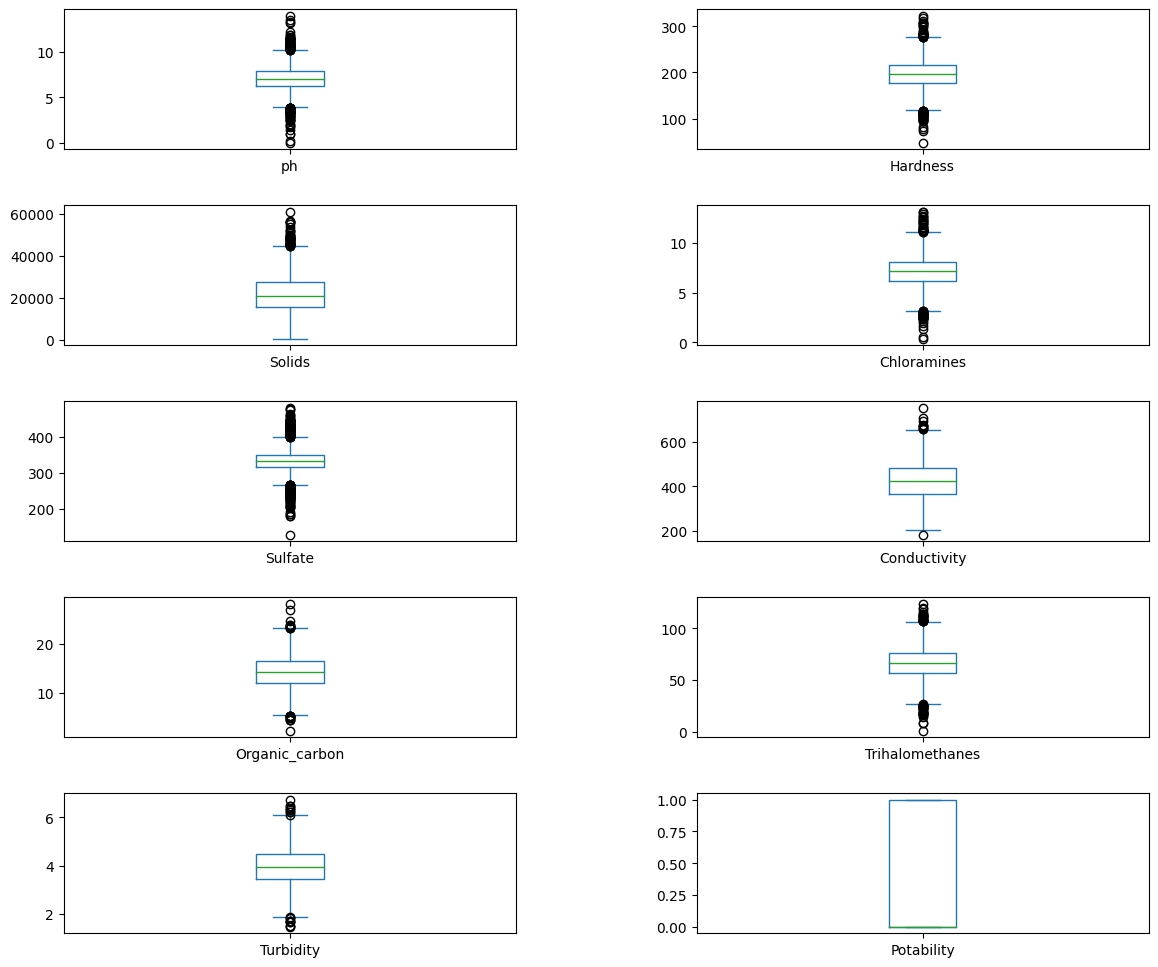

In [9]:
import matplotlib.pyplot as plt

dataset.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False, figsize=(14,12))

# Adjusting the space between the plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plots
plt.show()

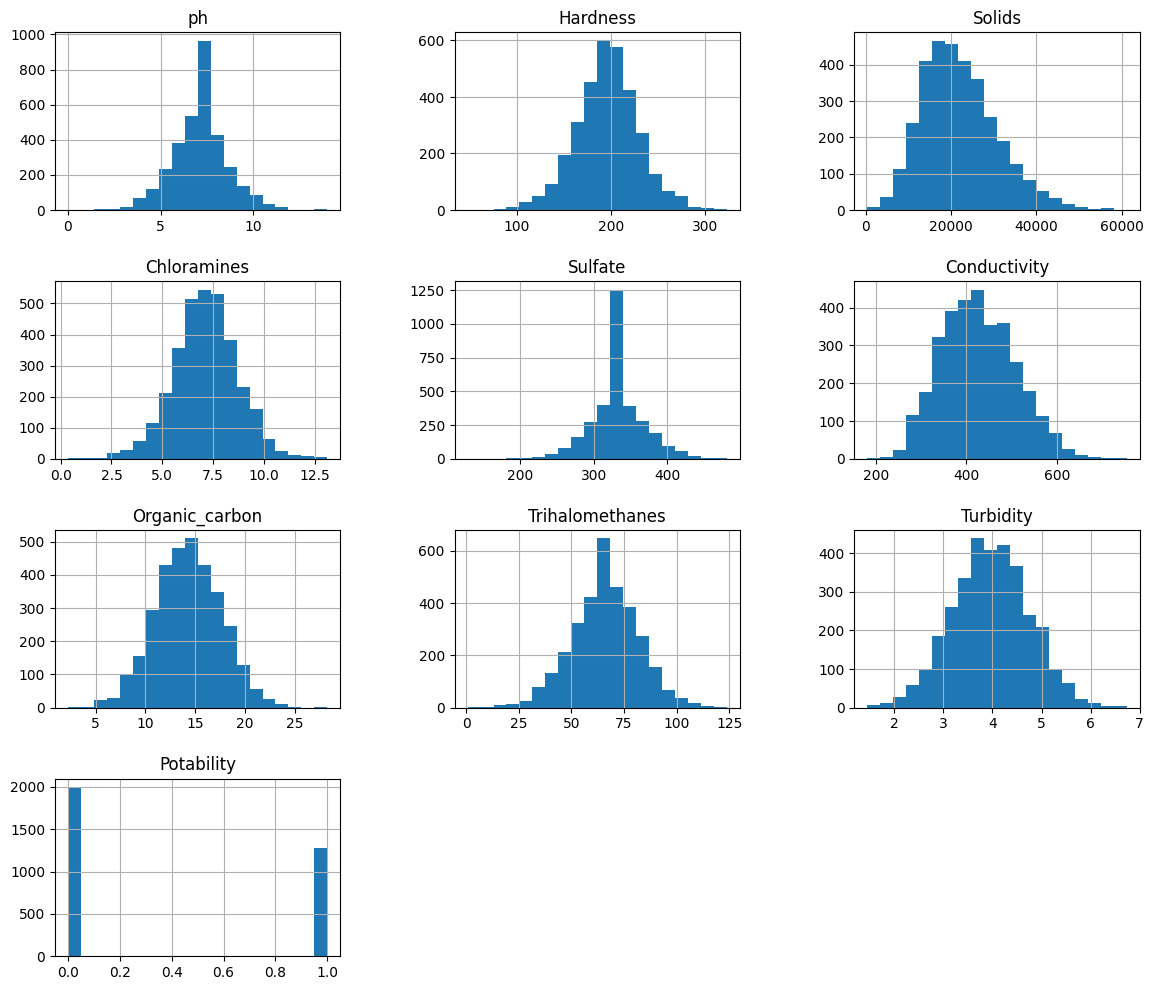

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for each column in the dataset
dataset.hist(figsize=(14, 12), bins=20)

# Adjust the spacing between the plots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plots
plt.show()


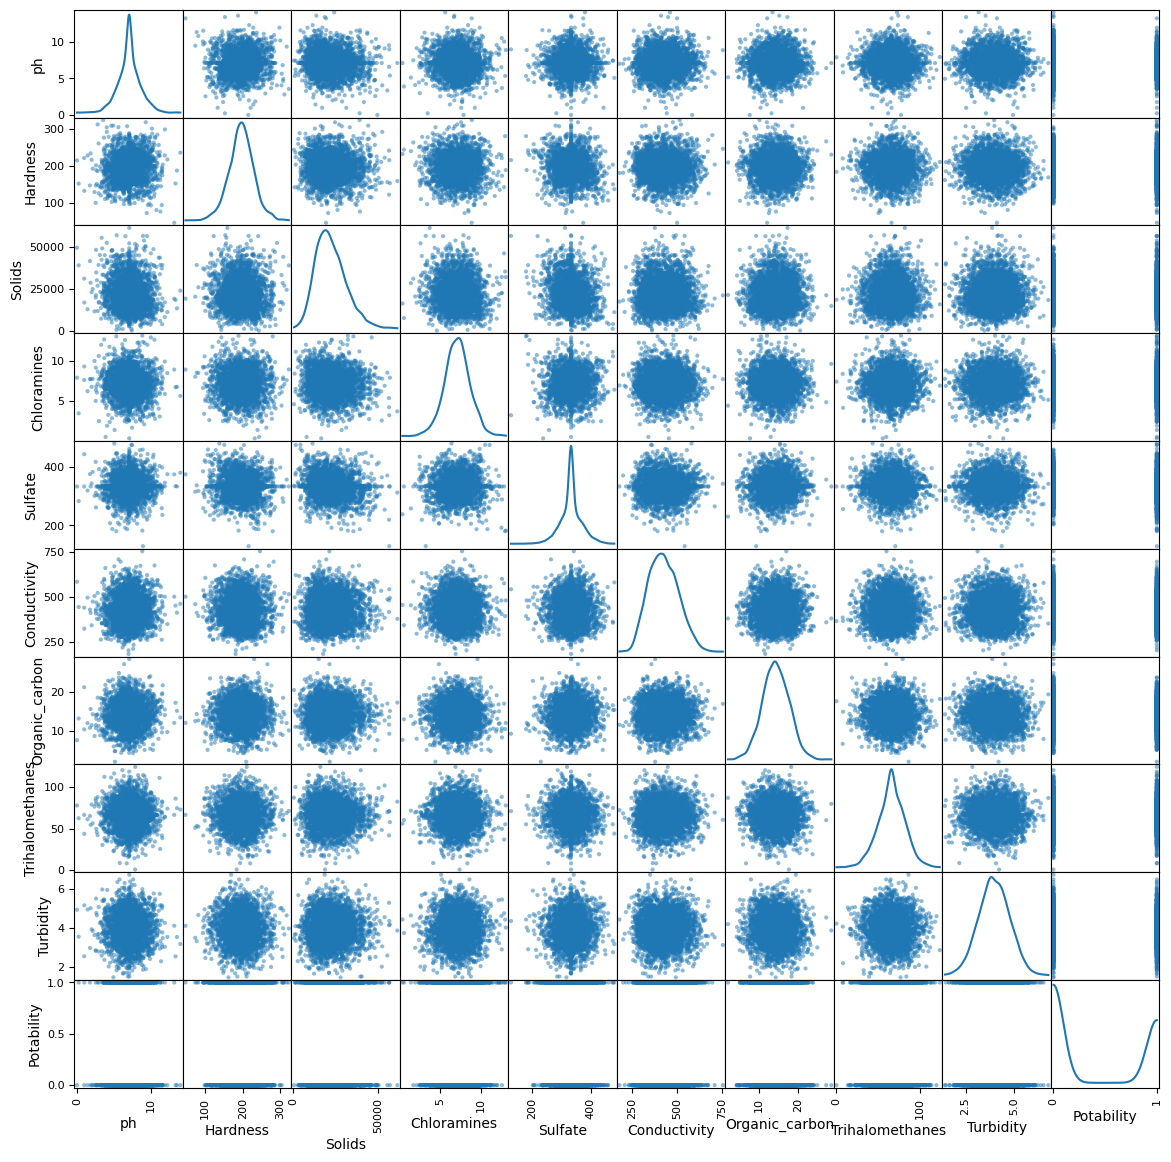

In [11]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Create scatter matrix
scatter_matrix(dataset, figsize=(14, 14), diagonal='kde')

# Show the plot
plt.show()


**evaluate**

In [12]:
array = dataset.values
X = array[:,0:9]
Y = array[:,9]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

In [13]:
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)

cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy', error_score='raise')


NameError: name 'model' is not defined

In [14]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Define models to evaluate
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Seed for reproducibility
seed = 7

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.614504 (0.021113)
LDA: 0.614504 (0.021113)
KNN: 0.565649 (0.027407)
CART: 0.596947 (0.021605)
NB: 0.626336 (0.033206)
SVM: 0.614122 (0.021144)


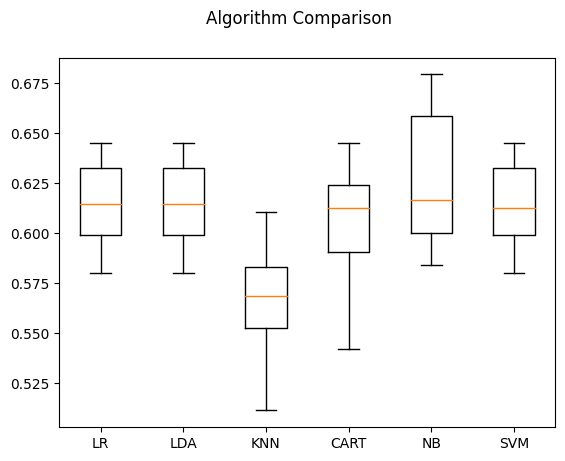

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5564024390243902
[[279 109]
 [182  86]]
              precision    recall  f1-score   support

         0.0       0.61      0.72      0.66       388
         1.0       0.44      0.32      0.37       268

    accuracy                           0.56       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.54      0.56      0.54       656

